In [2]:
import numpy as np
import matplotlib.pyplot as plt
import Pyside2 as py2

ModuleNotFoundError: ignored

Enter function of x: x ^ 6 - 3 * x
Enter Min value of x: -3
Enter Max value of x: 3



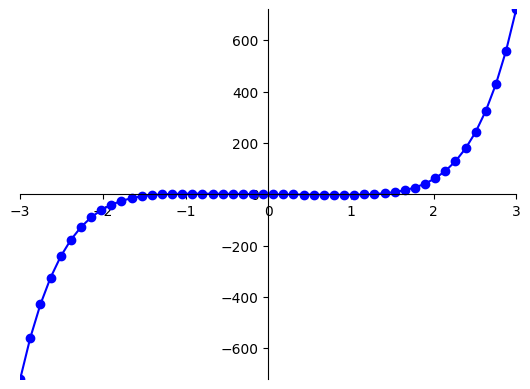

In [3]:
class Function_Plotter:

  def __init__(self):
    """

    Initializes the FunctionPlotter object by getting the function, minimum value of x, and maximum value of x from the user,
    It also calls the `is_input_valid()` method to validate the function input and the `plot()` method to generate the plot.
    and it check if min_x and max_s strings contain only numeric characters and a single dot
    """
    while True:
      self.func = input('Enter function of x: ').replace(' ','')

      if self.is_input_valid():
        self.min_x = input('Enter Min value of x: ')
        self.max_x = input('Enter Max value of x: ')

        check_min = [True if i.isdigit() or i == '.' or i == 'e' or i == '-' else False for i in self.min_x]
        check_min = np.logical_and(check_min, self.min_x.count('.') <= 1)

        check_max = [True if i.isdigit() or i == '.' or i == 'e' or i == '-' else False for i in self.max_x]
        check_max = np.logical_and(check_max, self.max_x.count('.') <= 1)

        if all(check_min) and all(check_max):
          self.min_x = float(self.min_x)
          self.max_x = float(self.max_x)
          self.plot()
          break
        else:
          print('\nInvalid value, min_x and max_x should be numeric value')
          self.__init__()
      else:
        print("\nInvalid function. Please re-enter.")


  def is_input_valid(self):
    """

      This function checks if the input function string is in the appropriate format for evaluation.
      It verifies the presence of 'x' variable, checks for valid characters (digits, 'x', operators),
      ensures correct placement of operators and operands, and validates the order of parentheses.

      Parameters:
        None

      Returns:
        bool: True if the function string is in the appropriate format, False otherwise.
    """

    if 'x' not in self.func or 'xx' in self.func :
      print("Error!, Missing 'x' in the function or double 'xx'")
      return False

    operators = ['-', '+', '*', '/', '^']
    valid_chars = list('0123456789x')
    parentheses =  ['(',')']
    brackets = 0

    for i in range(len(self.func)):
      if self.func[i] not in valid_chars + operators +parentheses:
        print(f"Error!, Invalid character ({self.func[i],i}) in the function, these only permissible characters {operators+ valid_chars+ parentheses}")
        return False

      if self.func[i] == 'x' and ((self.func[i-1] not in operators + parentheses and i != 0) or (i != len(self.func) - 1 and self.func[i+1] not in operators + parentheses)):
        print("Error!, Numbers found before or after 'x' in the function")
        return False

      if self.func[i] in operators:
        if (self.func[0] in operators[1:] or self.func[-1] in operators) or (self.func[i] != '-' and i == len(self.func) - 1 or self.func[i + 1] not in valid_chars) or (self.func[i-1] == '(' or self.func[i+1] == ')'):
          print("Error!, Incorrect placement of operators and operands")
          return False
        elif self.func[i - 1] not in valid_chars and self.func[i + 1] not in valid_chars:
          print("Error!, Incorrect placement of operators and operands")
          return False

      if self.func[i] == '(':
        brackets += 1
      elif self.func[i] == ')':
        brackets -= 1

      if brackets < 0:
        print("Error: Incorrect order of parentheses")
        return False

    if brackets != 0:
      print("Error: Incorrect order of parentheses")
      return False

    return True


  def evaluation(self, val):
    """
    Evaluates the function for a given value.

    Parameters:
      val: The value of min_x and max_x in the function.

    Returns:
      The result of evaluating the function for the given value, or False if an error occurs.
    """

    modified_func  = self.func.replace('^','**')
    modified_func  = modified_func.replace('x', str(val))
    result = 0

    try:
      result = eval(modified_func)
    except Exception as err:
      print("An error occurred:", str(err),'\n')
      self.__init__()

    return result


  def plot(self):
    """
    Generates a plot of the function graphically on the x and y axes using matplotlib.
    This method calculates the y-values for a given range of x-values based on the function equation entered by the user,
    It then plots the calculated points on a graph and displays it.

    Parameters:
      None

    Returns:
      None
    """

    fig, axis = plt.subplots()

    x_axis = np.linspace(self.min_x, self.max_x)
    y_axis = [self.evaluation(x) for x in x_axis]

    axis.set_xlim(self.min_x, self.max_x)
    axis.set_ylim(min(y_axis), max(y_axis))

    axis.spines['left'].set_position('zero')
    axis.spines['bottom'].set_position('zero')

    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

    axis.plot(x_axis, y_axis, 'bo-')

    print()
    plt.show()


a = Function_Plotter()